**Проблема**: я не можу вирішити, в який заклад швидкого харчування піти поїсти.

**Дані**: оцінки закладу у Google.
**Засвідчення**: кожна оцінка "5" та "4" на користь того, що в закладі можна смачно поїсти.

**Дано**:
- 3319 відгуків (5 зірок),
- 1232 відгуки (4 зірки),
- 5393 відгуки (усього)

#**Баєсів аналіз**

In [2]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
from scipy.stats import binom

In [ ]:
# Пріорні параметри (e.g., неінформативний пріор Beta(1,1))
# alpha_prior: "успіхи"
# beta_prior: "невдачі"
alpha_prior = 4
beta_prior = 6
print(f"Розподіл пріорів: Beta(alpha={alpha_prior}, beta={beta_prior})\n")

Розподіл пріорів: Beta(alpha=4, beta=6)



In [3]:
# Зібрані дані
total_reviews = 5393
good_reviews = 4551 #4 і 5 зірок
bad_reviews = total_reviews - good_reviews

print(f"Зібрані дані: {good_reviews} позитивних відгуків з {total_reviews}.\n")

Зібрані дані: 4551 позитивних відгуків з 5393.



In [ ]:
# Розрахунок апостеріорних параметрів
# alpha_posterior = alpha_prior + observed_successes
# beta_posterior = beta_prior + observed_failures
alpha_posterior = alpha_prior + good_reviews
beta_posterior = beta_prior + bad_reviews

print(f"Апостеріорний розподіл (версія 1): Beta(alpha={alpha_posterior}, beta={beta_posterior})\n")

Апостеріорний розподіл (версія 1): Beta(alpha=4555, beta=848)



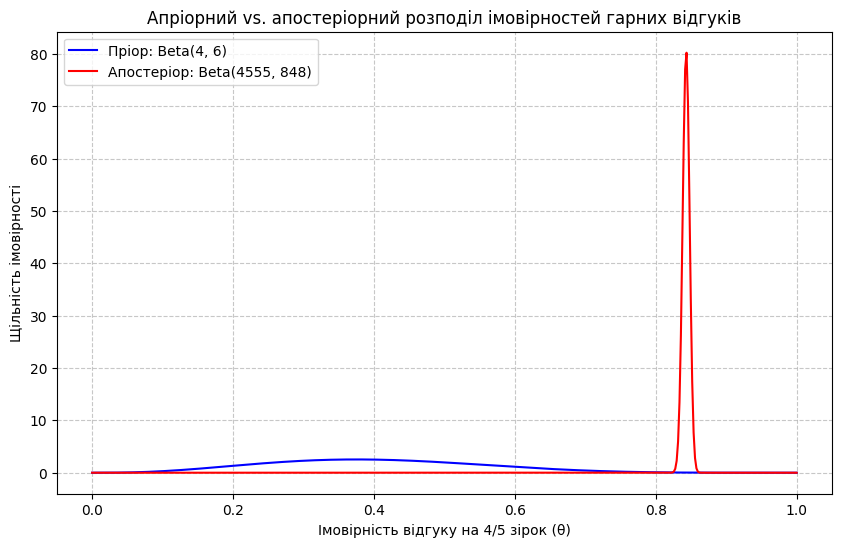

In [ ]:
#Створити простір значень для тети
theta_values = np.linspace(0, 1, 500)

#Розрахувати функція щільності ймовірності для апріорного розподілу
prior_pdf = beta.pdf(theta_values, alpha_prior, beta_prior)

# ФЩЙ для апостеріорного розподілу
posterior_pdf_v1 = beta.pdf(theta_values, alpha_posterior, beta_posterior)

plt.figure(figsize=(10, 6))
#Графік для версії 1
plt.plot(theta_values, prior_pdf, label=f'Пріор: Beta({alpha_prior}, {beta_prior})', color='blue')
plt.plot(theta_values, posterior_pdf_v1, label=f'Апостеріор: Beta({alpha_posterior}, {beta_posterior})', color='red')
plt.title('Апріорний vs. апостеріорний розподіл імовірностей гарних відгуків')
plt.xlabel('Імовірність відгуку на 4/5 зірок (θ)')
plt.ylabel('Щільність імовірності')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Розрахувати середній апостеріор
posterior_mean = alpha_posterior / (alpha_posterior + beta_posterior)

print(f"Апостеріорна середня ймовірність: {posterior_mean:.4f}")

Апостеріорна середня ймовірність: 0.8431


In [15]:
#Розрахувати імовірний інтервал у 95% для тети
# Дає простір значень, в яких я можу бути впевненим на 95%
lower_bound_95_v1 = beta.ppf(0.025, alpha_posterior, beta_posterior)
upper_bound_95_v1 = beta.ppf(0.975, alpha_posterior, beta_posterior)

print(f"Імовірнісний інтервал: [{lower_bound_95_v1:.4f}, {upper_bound_95_v1:.4f}]")

Імовірнісний інтервал: [0.8866, 0.9376]


#**Частотницький аналіз**

Нульова гіпотеза (Н0): P(4 або 5 зірок) = 0,2.

Альтернативна гіпотеза (Н1): P(4 або 5 зірок) = 0,4.

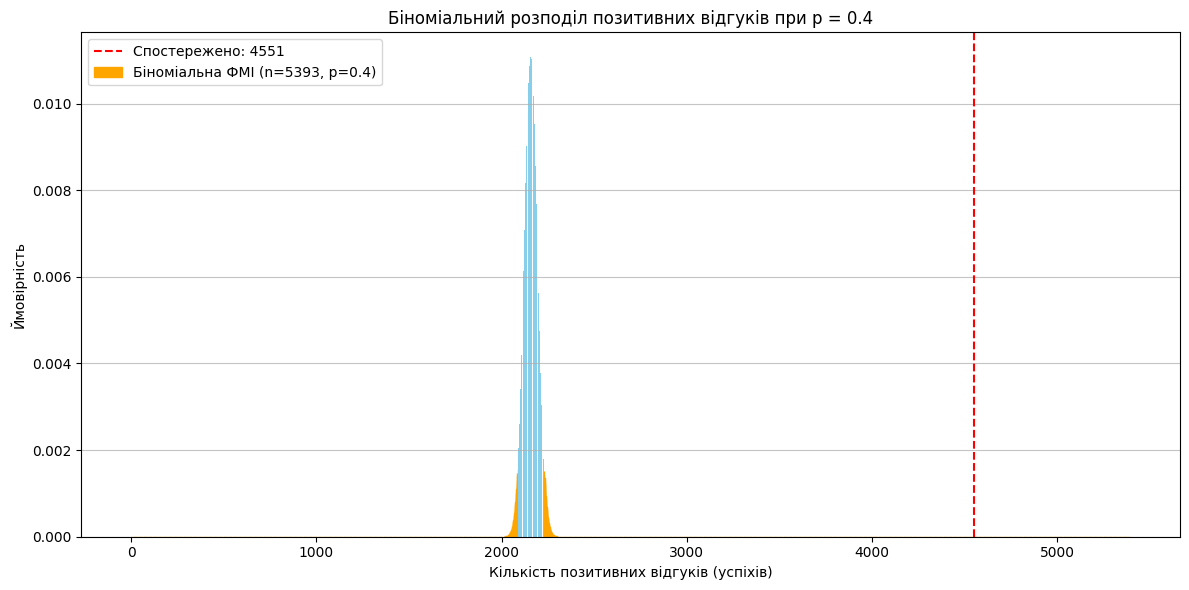

Кумулятивна ймовірність ліворуч від 4551: 1.0000
Кумулятивна ймовірність праворуч від 4551: 0.0000
Двобічна p-value: 0.0000


In [4]:
p_H1 = 0.4
significance_level = 0.05

# Простір можливих значень успіхів
x = np.arange(0, total_reviews + 1)
pmf = binom.pmf(x, total_reviews, p_H1)

# Критичні області (двобічна перевірка)
cumulative_left = binom.cdf(good_reviews, total_reviews, p_H1)
cumulative_right = 1 - binom.cdf(good_reviews - 1, total_reviews, p_H1)

# Мінімальні значення x, де кумулятивна ймовірність менша за альфа/2
x_left = np.where(binom.cdf(x, total_reviews, p_H1) <= significance_level / 2)[0]
x_right = np.where(1 - binom.cdf(x - 1, total_reviews, p_H1) <= significance_level / 2)[0]

# Побудова графіка
plt.figure(figsize=(12, 6))
bars = plt.bar(x, pmf, color='skyblue', label=f'Біноміальна ФМІ (n={total_reviews}, p={p_H1})')

# Підсвічуємо критичні області
for i in x_left:
    bars[i].set_color('orange')
for i in x_right:
    bars[i].set_color('orange')

# Вертикальна лінія спостереженого значення
plt.axvline(x=good_reviews, color='red', linestyle='--', label=f'Спостережено: {good_reviews}')

# Анотація
plt.title(f'Біноміальний розподіл позитивних відгуків при p = {p_H1}')
plt.xlabel('Кількість позитивних відгуків (успіхів)')
plt.ylabel('Ймовірність')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.tight_layout()
plt.show()

# Текстовий вивід для аналізу
print(f"Кумулятивна ймовірність ліворуч від {good_reviews}: {cumulative_left:.4f}")
print(f"Кумулятивна ймовірність праворуч від {good_reviews}: {cumulative_right:.4f}")
print(f"Двобічна p-value: {2 * min(cumulative_left, cumulative_right):.4f}")

In [6]:
p_value = binom.sf(good_reviews - 1, total_reviews, p_H1)

print(f"\n--- Результати тесту гіпотези ---")
print(f"P-value: {p_value}")

if p_value < significance_level:
    print(f"Оскільки P-value ({p_value:.4f}) < рівня значущості ({significance_level}), нульова гіпотеза відкидається.")
else:
    print(f"Оскільки P-value ({p_value:.4f}) >= Significance Level ({significance_level}), нульову гіпотезу не вдалося відкинути.")


--- Результати тесту гіпотези ---
P-value: 0.0
Оскільки P-value (0.0000) < рівня значущості (0.05), нульова гіпотеза відкидається.


In [10]:
from statsmodels.stats.proportion import proportions_ztest

p_H0 = 0.2
z_stat, p_value = proportions_ztest(count=good_reviews, nobs=total_reviews, value=p_H0, alternative='larger')

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Z-statistic: 130.2673
P-value: 0.0000
